<a href="https://colab.research.google.com/github/Ark1645/Deep-Learning/blob/main/Resnet%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#creare a directory name './kaggle'
!mkdir ~/.kaggle/

In [2]:
#copy the kaggle api json path
!cp "/content/drive/MyDrive/Deep Learning/kaggle.json" ~/.kaggle/kaggle.json

In [3]:
#set the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#installing the kaggle python package
!python -m pip install -qq kaggle

In [5]:
#downloading the dataset from kaggle
!kaggle datasets download -d noulam/tomato

100% 742M/743M [00:25<00:00, 34.7MB/s]
100% 743M/743M [00:25<00:00, 30.8MB/s]


In [ ]:
#unzipping the dataset file
!unzip -qq "tomato"

In [6]:
!nvidia-smi

Tue Jan 30 03:57:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [ ]:
!pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [8]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [9]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [10]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.application.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [11]:
IMG_SIZE=[224,224]
train_path="/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path="/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [12]:
inception=InceptionV3(input_shape=IMG_SIZE+[3],weights='imagenet',include_top=False)

87910968/87910968 [==============================] - 3s 0us/step


In [13]:
#now we wont train the existing layers
for layer in inception.layers:
  layer.trainable= False

In [14]:
#useful for getting the number of output classes
folders= glob('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*')

In [15]:
folders

['/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/New Plant 

In [16]:
#we are flattening our layers
x=Flatten()(inception.output)

prediction=Dense(len(folders), activation='softmax')(x)

#create a model
model=Model(inputs=inception.inputs, outputs=prediction)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [18]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5763 images belonging to 10 classes.


In [21]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [22]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-22-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
181/181 [==============================] - 4308s 24s/step - loss: 0.8024 - accuracy: 0.8856 - val_loss: 121.9458 - val_accuracy: 0.2894
Epoch 2/50
181/181 [==============================] - 142s 786ms/step - loss: 0.4907 - accuracy: 0.9396 - val_loss: 117.3925 - val_accuracy: 0.3049
Epoch 3/50
181/181 [==============================] - 140s 777ms/step - loss: 0.5099 - accuracy: 0.9434 - val_loss: 118.9683 - val_accuracy: 0.3289
Epoch 4/50
181/181 [==============================] - 124s 688ms/step - loss: 0.3891 - accuracy: 0.9627 - val_loss: 125.9394 - val_accuracy: 0.3001
Epoch 5/50
181/181 [==============================] - 125s 691ms/step - loss: 0.6055 - accuracy: 0.9490 - val_loss: 123.6356 - val_accuracy: 0.3202
Epoch 6/50
181/181 [==============================] - 127s 704ms/step - loss: 0.3597 - accuracy: 0.9643 - val_loss: 121.2879 - val_accuracy: 0.3529
Epoch 7/50
181/181 [==============================] - 122s 676ms/step - loss: 0.3642 - accuracy: 0.9660 - val_los

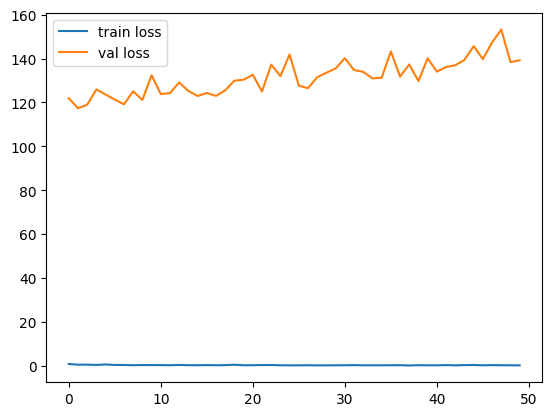

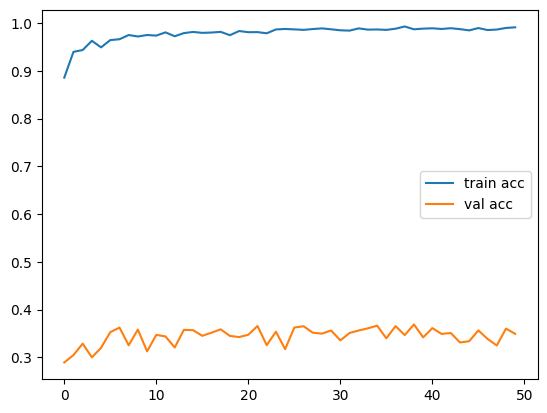

<Figure size 640x480 with 0 Axes>

In [24]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')
model.save('/content/gdrive/My Drive/model_resnet50.h5')

Now rest is just loading the model then to run a few predictions accordingly

In [27]:
y_pred = model.predict(test_set)

144/144 [==============================] - 31s 186ms/step


In [28]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.7819668e-26,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        8.9857295e-28, 0.0000000e+00]], dtype=float32)

In [29]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [30]:
y_pred

array([8, 6, 6, ..., 6, 8, 7])